<a href="https://colab.research.google.com/github/marwan229/Data_Science-project/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

**Data Collection & Processing**

In [2]:
df = pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [5]:
# getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the distribution of Target Variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

**Separating the features and target**

In [9]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [10]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**Splitting the data into training data & Testing data**

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


**Define the Model**

In [14]:
# importing tensorflow and Keras and setting up the layers of Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(24, input_dim=df.shape[1]-1, activation='relu', name='hidden_1'),
    Dense(12, activation='relu', name='hidden_2'),
    Dense(1, activation='sigmoid', name='output'),
])

**Compile the model**

In [15]:
# compiling the Neural Network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 24)                336       
                                                                 
 hidden_2 (Dense)            (None, 12)                300       
                                                                 
 output (Dense)              (None, 1)                 13        
                                                                 
Total params: 649 (2.54 KB)
Trainable params: 649 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Fit Model**

In [16]:
# training the neural Network
history = model.fit(X_train, Y_train,validation_split=0.1, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 38ms/step - loss: 4.7311 - accuracy: 0.4747 - val_loss: 2.6556 - val_accuracy: 0.6000
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 1.9332 - accuracy: 0.5300 - val_loss: 1.2153 - val_accuracy: 0.5600
Epoch 3/100
14/14 [==============================] - 0s 19ms/step - loss: 1.0987 - accuracy: 0.4793 - val_loss: 0.7086 - val_accuracy: 0.6800
Epoch 4/100
14/14 [==============================] - 0s 15ms/step - loss: 0.7659 - accuracy: 0.5069 - val_loss: 0.6657 - val_accuracy: 0.6000
Epoch 5/100
14/14 [==============================] - 0s 20ms/step - loss: 0.6506 - accuracy: 0.6267 - val_loss: 0.5992 - val_accuracy: 0.7200
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6218 - accuracy: 0.6682 - val_loss: 0.5797 - val_accuracy: 0.7600
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.6297 - accuracy: 0.6452 - val_loss: 0.5706 - val_accuracy: 0.7600
Epoch 8

**Evaluate model**

In [17]:
scores = model.evaluate(X_test, Y_test)
print (f'Accuracy: {round(scores[1]*100, 2)} %')

2/2 [==============================] - 0s 9ms/step - loss: 0.3546 - accuracy: 0.8852
Accuracy: 88.52 %


**Visualizing accuracy and loss**

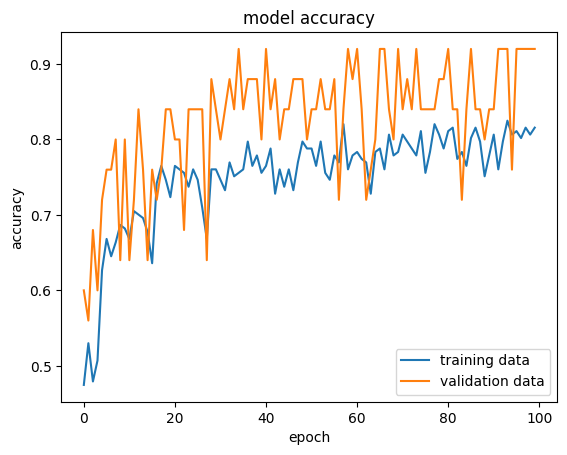

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

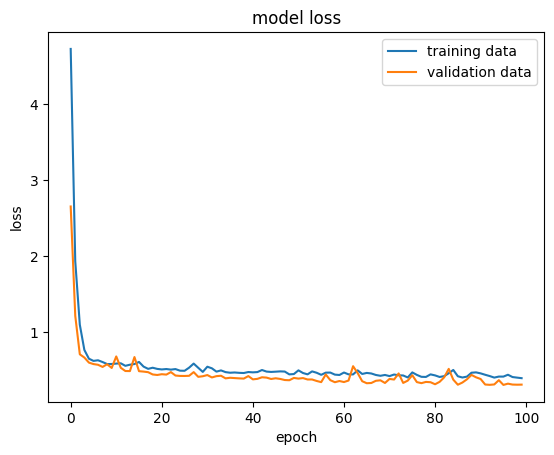

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')